In [1]:
# downloading helper_functions.py
!curl -O https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10139  100 10139    0     0  21910      0 --:--:-- --:--:-- --:--:-- 22185


In [2]:
# Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
# from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import plot_loss_curves, compare_historys, make_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [3]:
tf.keras.backend.clear_session()

In [4]:
oil = r'Images/train/Oily'
dry = r'Images/train/Dry'
burned = r'Images/train/Burned'
acne = r'Images/train/Acne'
dark_circles = r'Images/train/Dark_Circles'
dark_spots = r'Images/train/Dark_Spots'
fine_lines = r'Images/train/Fine_Lines'
clear_skin = r'Images/train/Clear_Skin'
wrinkles = r'Images/train/Wrinkles'
pimples = r'Images/train/Pimples'
blackheads = r'Images/train/Blackheads'
whiteheads = r'Images/train/Whiteheads'
patches = r'Images/train/Patches'
droppy = r'Images/train/Droppy'
droppy_upper_eyelid = r'Images/train/Droppy_Upper_Eyelid'
droppy_lower_eyelid = r'Images/train/Droppy_Lower_Eyelid'
eye_bags = r'Images/train/Eye_Bags'
redness = r'Images/train/Redness'
pores = r'Images/train/Pores'
pigmentation = r'Images/train/Pigmentation'

In [5]:
# Getting all the paths in a list
oil_list = []
for path in os.listdir(oil) :
  oil_list.append(oil + '/' + path)

dry_list = []
for path in os.listdir(dry) :
  dry_list.append(dry + '/' + path)

burned_list = []
for path in os.listdir(burned) :
  burned_list.append(burned + '/' + path)

acne_list = []
for path in os.listdir(acne) :
  acne_list.append(acne + '/' + path)

dark_circles_list = []
for path in os.listdir(dark_circles) :
  dark_circles_list.append(dark_circles + '/' + path)

dark_spots_list = []
for path in os.listdir(dark_spots) :
  dark_spots_list.append(dark_spots + '/' + path)

fine_lines_list = []
for path in os.listdir(fine_lines) :
  fine_lines_list.append(fine_lines + '/' + path)

clear_skin_list = []
for path in os.listdir(clear_skin) :
  clear_skin_list.append(clear_skin + '/' + path)

wrinkles_list = []
for path in os.listdir(wrinkles) :
  wrinkles_list.append(wrinkles + '/' + path)

pimples_list = []
for path in os.listdir(pimples) :
  pimples_list.append(pimples + '/' + path)

blackheads_list = []
for path in os.listdir(blackheads) :
  blackheads_list.append(blackheads + '/' + path)

whiteheads_list = []
for path in os.listdir(whiteheads) :
  whiteheads_list.append(whiteheads + '/' + path)

patches_list = []
for path in os.listdir(patches) :
  patches_list.append(patches + '/' + path)

droppy_list = []
for path in os.listdir(droppy) :
  droppy_list.append(droppy + '/' + path)

eye_bags_list = []
for path in os.listdir(eye_bags) :
  eye_bags_list.append(eye_bags + '/' + path)

redness_list = []
for path in os.listdir(redness) :
  redness_list.append(redness + '/' + path)

pores_list = []
for path in os.listdir(pores) :
  pores_list.append(pores + '/' + path)

pigmentation_list = []
for path in os.listdir(pigmentation) :
  pigmentation_list.append(pigmentation + '/' + path)

In [6]:
# Preprocess image function
img_size = (224, 224)

# def load_and_prep(filepath) :
#   img_path = tf.io.read_file(filepath)
#   img = tf.io.decode_image(img_path)
#   img = tf.image.resize(img, img_size)

#   return img

def load_and_prep(filepath):
    try:
        img_path = tf.io.read_file(filepath)
        img = tf.io.decode_image(img_path)
        img = tf.image.resize(img, img_size)
        if img.shape == (224, 224, 3) or img.shape == (224, 224, 4) :
            return img
        else:
            return None  # Skip images that don't match expected shape
    except tf.errors.InvalidArgumentError:
        print(f"Invalid image file: {filepath}. Skipping.")
        return None

In [7]:
# Getting only those images which are suitable
def corrImgs(arr) :
  corrImgsList = []
  for path in arr :
    img = load_and_prep(path)
    # if (img.shape[2] == 3) | (img.shape == 4) :
    if img is not None : 
      corrImgsList.append(path)

  return corrImgsList

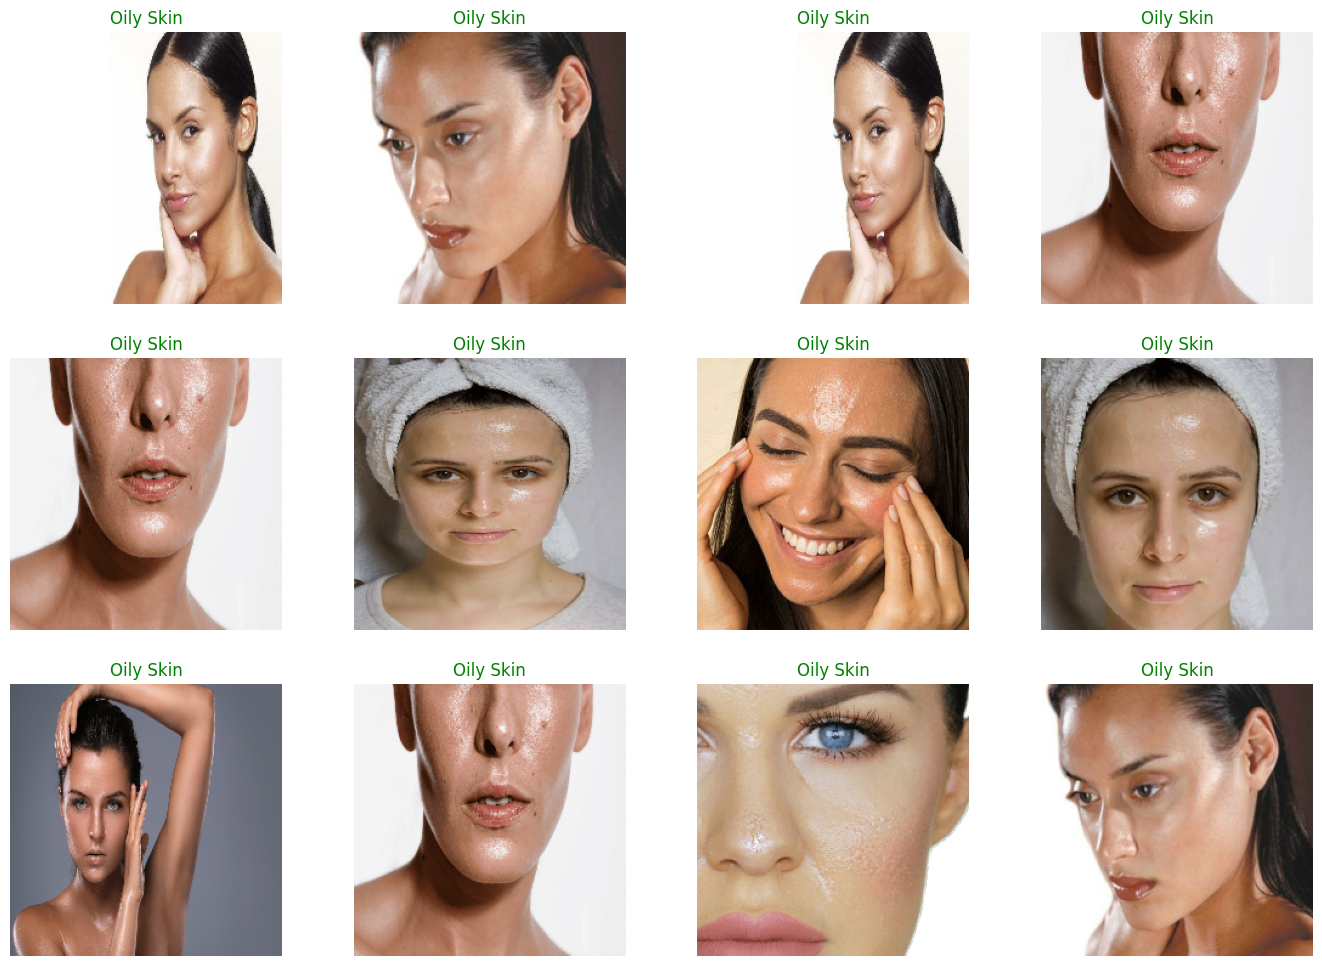

In [8]:
# Randomly plotting the Oily Skin images
random_oil_skin = np.random.choice(oil_list, size = 12, replace = False)
plt.figure(figsize = (17, 12))

for i in range(12) :
  img_path = random_oil_skin[i]
  img = load_and_prep(img_path)

  plt.subplot(3, 4, i + 1)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title('Oily Skin', color = 'green')

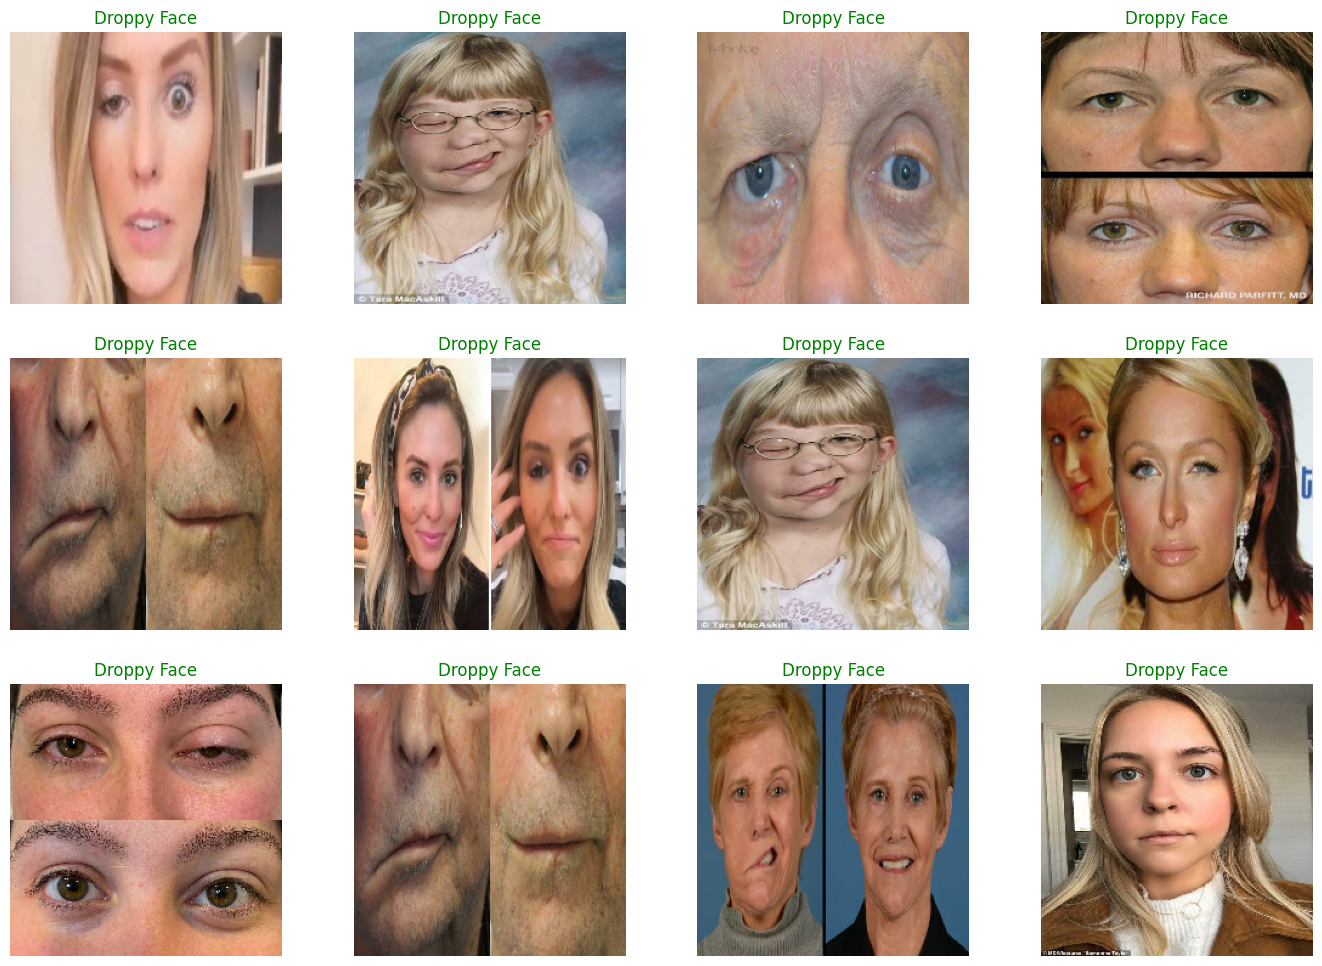

In [9]:
# Randomly plotting the Droppy Skin images
random_droppy_skin = np.random.choice(droppy_list, size = 12, replace = False)
plt.figure(figsize = (17, 12))

for i in range(12) :
  img_path = random_droppy_skin[i]
  img = load_and_prep(img_path)

  plt.subplot(3, 4, i + 1)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title('Droppy Face', color = 'green')

In [10]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomHeight(0.3),
    tf.keras.layers.RandomWidth(0.3), 
    tf.keras.layers.RandomContrast(0.3), 
    tf.keras.layers.RandomBrightness(0.3)],
    name = 'data_augmentation_layer')

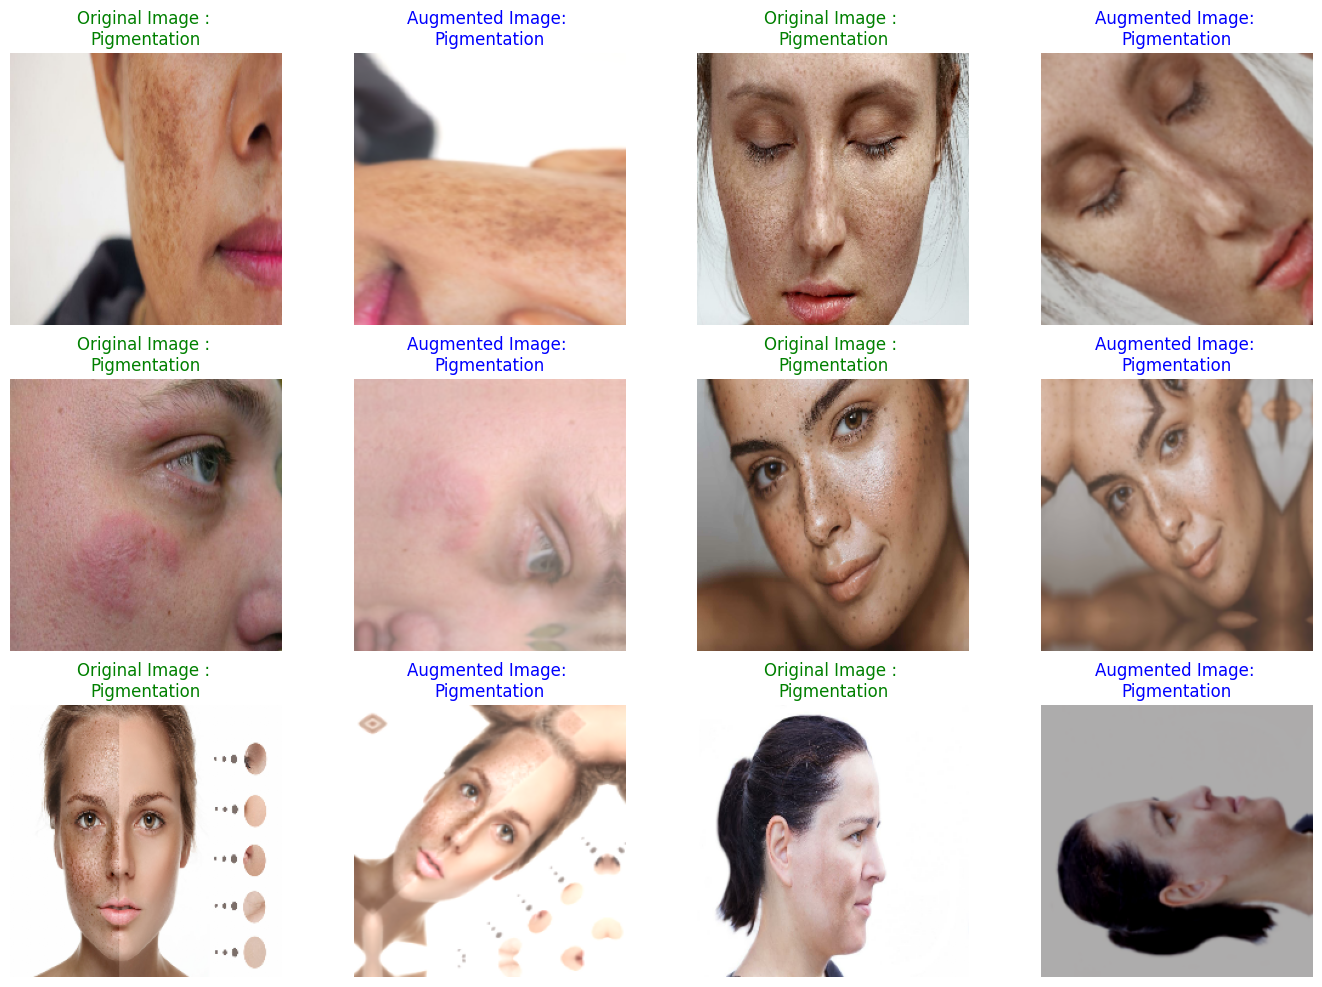

In [11]:
# Visualizing multiple randomly augmented oily skin images
plt.figure(figsize = (17, 12))
for i in range(1, 12, 2) :
  random_class = 'Pigmentation'
  random_img_path = random.choice(pigmentation_list)

  img = load_and_prep(random_img_path)
  aug_img = data_augmentation(tf.expand_dims(img, axis = 0))
  aug_img = tf.image.resize(aug_img[0], img_size)

  # Plotting original image
  plt.subplot(3, 4, i)
  plt.axis(False)
  plt.imshow(img / 255)
  plt.title(f'Original Image : \n{random_class}', color = 'green')

  # Plotting augmented image
  plt.subplot(3, 4, i + 1)
  plt.axis(False)
  plt.imshow(aug_img / 255)
  plt.title(f"Augmented Image: \n{random_class}", color = "blue")

In [12]:
# Train Test splits
data_gen = ImageDataGenerator(validation_split=0.2)

train_data = data_gen.flow_from_directory(directory="Images/train",
                                          subset='training',
                                          target_size=img_size, 
                                          class_mode = 'categorical')

test_data = data_gen.flow_from_directory(directory="Images/train",
                                         subset='validation',
                                         target_size=img_size,
                                         class_mode = 'categorical')

Found 3782 images belonging to 18 classes.
Found 939 images belonging to 18 classes.


In [13]:
len(train_data), len(test_data)

(119, 30)

In [14]:
# Building the Model

In [15]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [16]:
# Setting up input layer

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(18, activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

In [17]:
# compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
                metrics=["accuracy"])

In [18]:
# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 200,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data) // 4)

Epoch 1/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 129s 944ms/step - accuracy: 0.0647 - loss: 2.9444 - val_accuracy: 0.0893 - val_loss: 2.8023
Epoch 2/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0625 - val_loss: 2.8580
Epoch 3/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 101s 825ms/step - accuracy: 0.1550 - loss: 2.6995 - val_accuracy: 0.1295 - val_loss: 2.6686
Epoch 4/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1339 - val_loss: 2.7044
Epoch 5/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 99s 810ms/step - accuracy: 0.2489 - loss: 2.5180 - val_accuracy: 0.1163 - val_loss: 2.6764
Epoch 6/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2277 - val_loss: 2.5307
Epoch 7/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 103s 850ms/step - accuracy: 0.3196 - loss: 2.3896 - val_accuracy: 0.2143 - val_loss: 2.4651
Epoch 8/200
119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step -

In [19]:
# Evaluating the model
model_1.evaluate(test_data)

30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.4467 - loss: 1.8969


[1.8840508460998535, 0.4568690061569214]

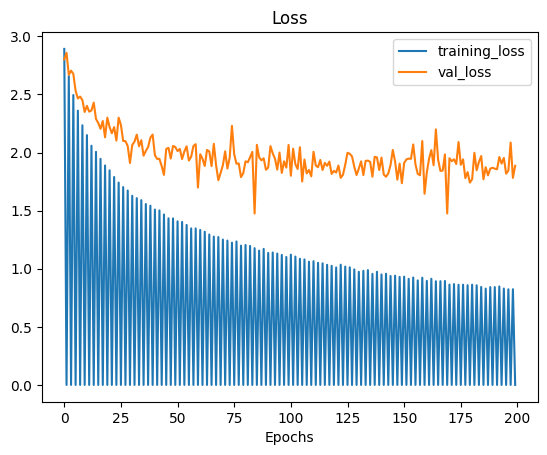

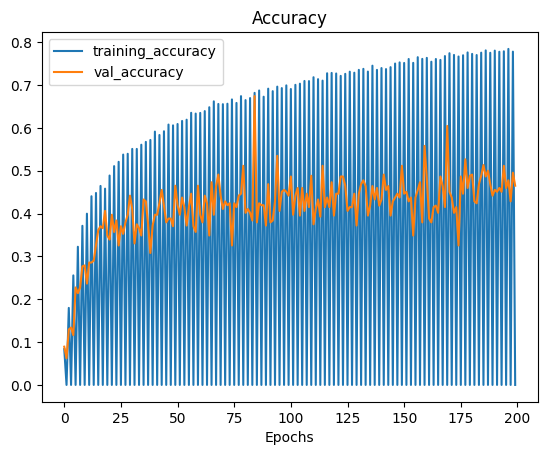

In [20]:
# Plotting loss curves
plot_loss_curves(history_1)

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5] : 
    layer.trainable = False

# Recompile model with lower learning rate
model_1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(1e-4), metrics = ['accuracy'])

# Fine-tune for 30 more epochs
fine_tune_epochs = 400

history_1_fine_tune_1 = model_1.fit(train_data, epochs = fine_tune_epochs, 
                                    validation_data = test_data, 
                                    validation_steps = len(test_data) // 4,
                                    initial_epoch = history_1.epoch[-1])

Epoch 200/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.7144 - loss: 0.9580 - val_accuracy: 0.4598 - val_loss: 1.9692
Epoch 201/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.8071 - loss: 0.7384 - val_accuracy: 0.4866 - val_loss: 1.9261
Epoch 202/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.8302 - loss: 0.6383 - val_accuracy: 0.4420 - val_loss: 1.9813
Epoch 203/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.8401 - loss: 0.6019 - val_accuracy: 0.4420 - val_loss: 2.2227
Epoch 204/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.8416 - loss: 0.5602 - val_accuracy: 0.3953 - val_loss: 2.0569
Epoch 205/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8549 - loss: 0.5189 - val_accuracy: 0.5000 - val_loss: 1.7984
Epoch 206/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8813 - loss: 0.4651 - val_accuracy: 0.4821 - val_loss: 2.0967
Epoch 207/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.8787 -

In [ ]:
import pickle

with open("Model_Train.pkl", "wb") as file : 
    pickle.dump(model_1, file)

In [ ]:
# Saving the model 
import keras
model_1.save("Model-Train.keras")

In [ ]:
compare_historys(history_1, history_1_fine_tune_1)

In [ ]:
# Model summary
model_1.summary()

In [ ]:
# Getting test image file paths
test_data_img_path = test_data.filepaths
np.random.shuffle(test_data_img_path)

# Getting labels
test_data_labels = [path.split('\\')[1] for path in test_data_img_path]

# Ensure the labels are correctly extracted
print(test_data_labels[:10]) 

In [ ]:
# Creating a dataframe of test paths
df_test = pd.DataFrame({"Image Path" : test_data_img_path, "Labels" : test_data_labels})

df_test.sample(10)

In [ ]:
len(df_test)

In [ ]:
# Generating a test dataset 
test_data_shuff = data_gen.flow_from_dataframe(df_test, directory = None, x_col = "Image Path", y_col = "Labels", 
                                               shuffle = False, target_size = (224, 224))
# Directory should be None if using absolute paths in Image Path

In [ ]:
# Loading the best model
model = tf.keras.models.load_model("Model-Train.keras")

In [ ]:
# Getting prediction probabilites
pred_prob = model.predict(test_data_shuff)
pred_prob[:20]

In [ ]:
Y_pred = pred_prob.argmax(axis = 1)
Y_pred[:20]

In [ ]:
# Labels 
test_data.class_indices

In [ ]:
# Converting our text labels into numbers
Y_true = []

for label in test_data_labels:
    if label == 'Acne':
        label_ = 0
    elif label == 'Blackheads':
        label_ = 1
    elif label == 'Burned':
        label_ = 2
    elif label == 'Clear_Skin':
        label_ = 3
    elif label == 'Dark_Circles':
        label_ = 4
    elif label == 'Dark_Spots':
        label_ = 5
    elif label == 'Droppy':
        label_ = 6
    elif label == 'Dry':
        label_ = 7
    elif label == 'Eye_Bags':
        label_ = 8
    elif label == 'Fine_Lines':
        label_ = 9
    elif label == 'Oily':
        label_ = 10
    elif label == 'Patches':
        label_ = 11
    elif label == 'Pigmentation':
        label_ = 12
    elif label == 'Pimples':
        label_ = 13
    elif label == 'Pores':
        label_ = 14
    elif label == 'Redness':
        label_ = 15
    elif label == 'Whiteheads':
        label_ = 16
    elif label == 'Wrinkles':
        label_ = 17
    else:
        label_ = -1  # Handle unexpected labels
    
    Y_true.append(label_)

Y_true = np.array(Y_true)
Y_true[:20]

In [ ]:
# Plotting a confusion matrix
class_names = ['Acne', 'Blackheads', 'Burned', 'Clear_Skin', 'Dark_Circles', 'Dark_Spots', 'Droppy', 'Dry', 'Eye_Bags', 'Fine_Lines', 'Oily', 
               'Patches', 'Pigmentation', 'Pimples', 'Pores', 'Redness', 'Whiteheads', 'Wrinkles']

make_confusion_matrix(y_true = Y_true, y_pred = Y_pred, classes = class_names, figsize = (13, 13), norm = False)

In [ ]:
# To get suitable images
corrImgList = corrImgs(test_data_img_path)

In [ ]:
# Check the comparison between Actual & Predicted with their Probabilities
path_list = np.random.choice(corrImgList, size=12, replace=False)
plt.figure(figsize=(17, 12))
for i in range(12):
  img_path = path_list[i]
  class_name = img_path.split("\\")[1]
  img = load_and_prep(img_path)

  pred_prob  = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  # Plot the image(s)
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255.)
  title_color = "g" if class_name == pred_class else "r"
  plt.title(f"Actual: {class_name}, Pred: {pred_class}, \nprob: {pred_prob.max():.2f}%", c=title_color)
  plt.axis(False);

In [ ]:
# Getting test labels
test_labels = []
for path in test_data_img_path :
  test_labels.append(path.split("\\")[1])

print(test_labels[:15])

In [ ]:
df_pred = pd.DataFrame({"filename" : test_data_img_path,
                         "Labels": test_labels,
                         "Actual": Y_true,
                         "Predicted": Y_pred})

df_pred.sample(10)

In [ ]:
# Save to CSV file
df_pred.to_csv("Test-Pred.csv")

In [ ]:
len(test_data_img_path)

In [ ]:
# Wrong predicted images
wrong_pred_test_paths = []
for i in range(len(test_data_img_path)):
  if Y_true[i] != Y_pred[i]:
    wrong_pred_test_paths.append(test_data_img_path[i])

len(wrong_pred_test_paths)

In [ ]:
# Wrongly predicted images
plt.figure(figsize=(17, 12))
for i in range(4):
  img_path = wrong_pred_test_paths[i]
  class_name = img_path.split("\\")[1]
  img = load_and_prep(img_path)

  pred_prob  = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  # Plot the image(s)
  plt.subplot(3, 4, i+1)
  plt.imshow(img/255.)
  title_color = "g" if class_name == pred_class else "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, \nprob: {pred_prob.max():.2f}%", c=title_color)
  plt.axis(False);